In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [43]:
#wineデータセットの読み込み
from sklearn.datasets import load_wine
wine = load_wine()
wine_df = pd.DataFrame(wine.data, columns=wine.feature_names)
wine_df['target'] = wine.target

#データの概要
print(wine_df.head())
wine_df.info()

   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline  target  
0          

In [44]:
wine_df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


In [32]:
wine_df.columns

Index(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline', 'target'],
      dtype='object')

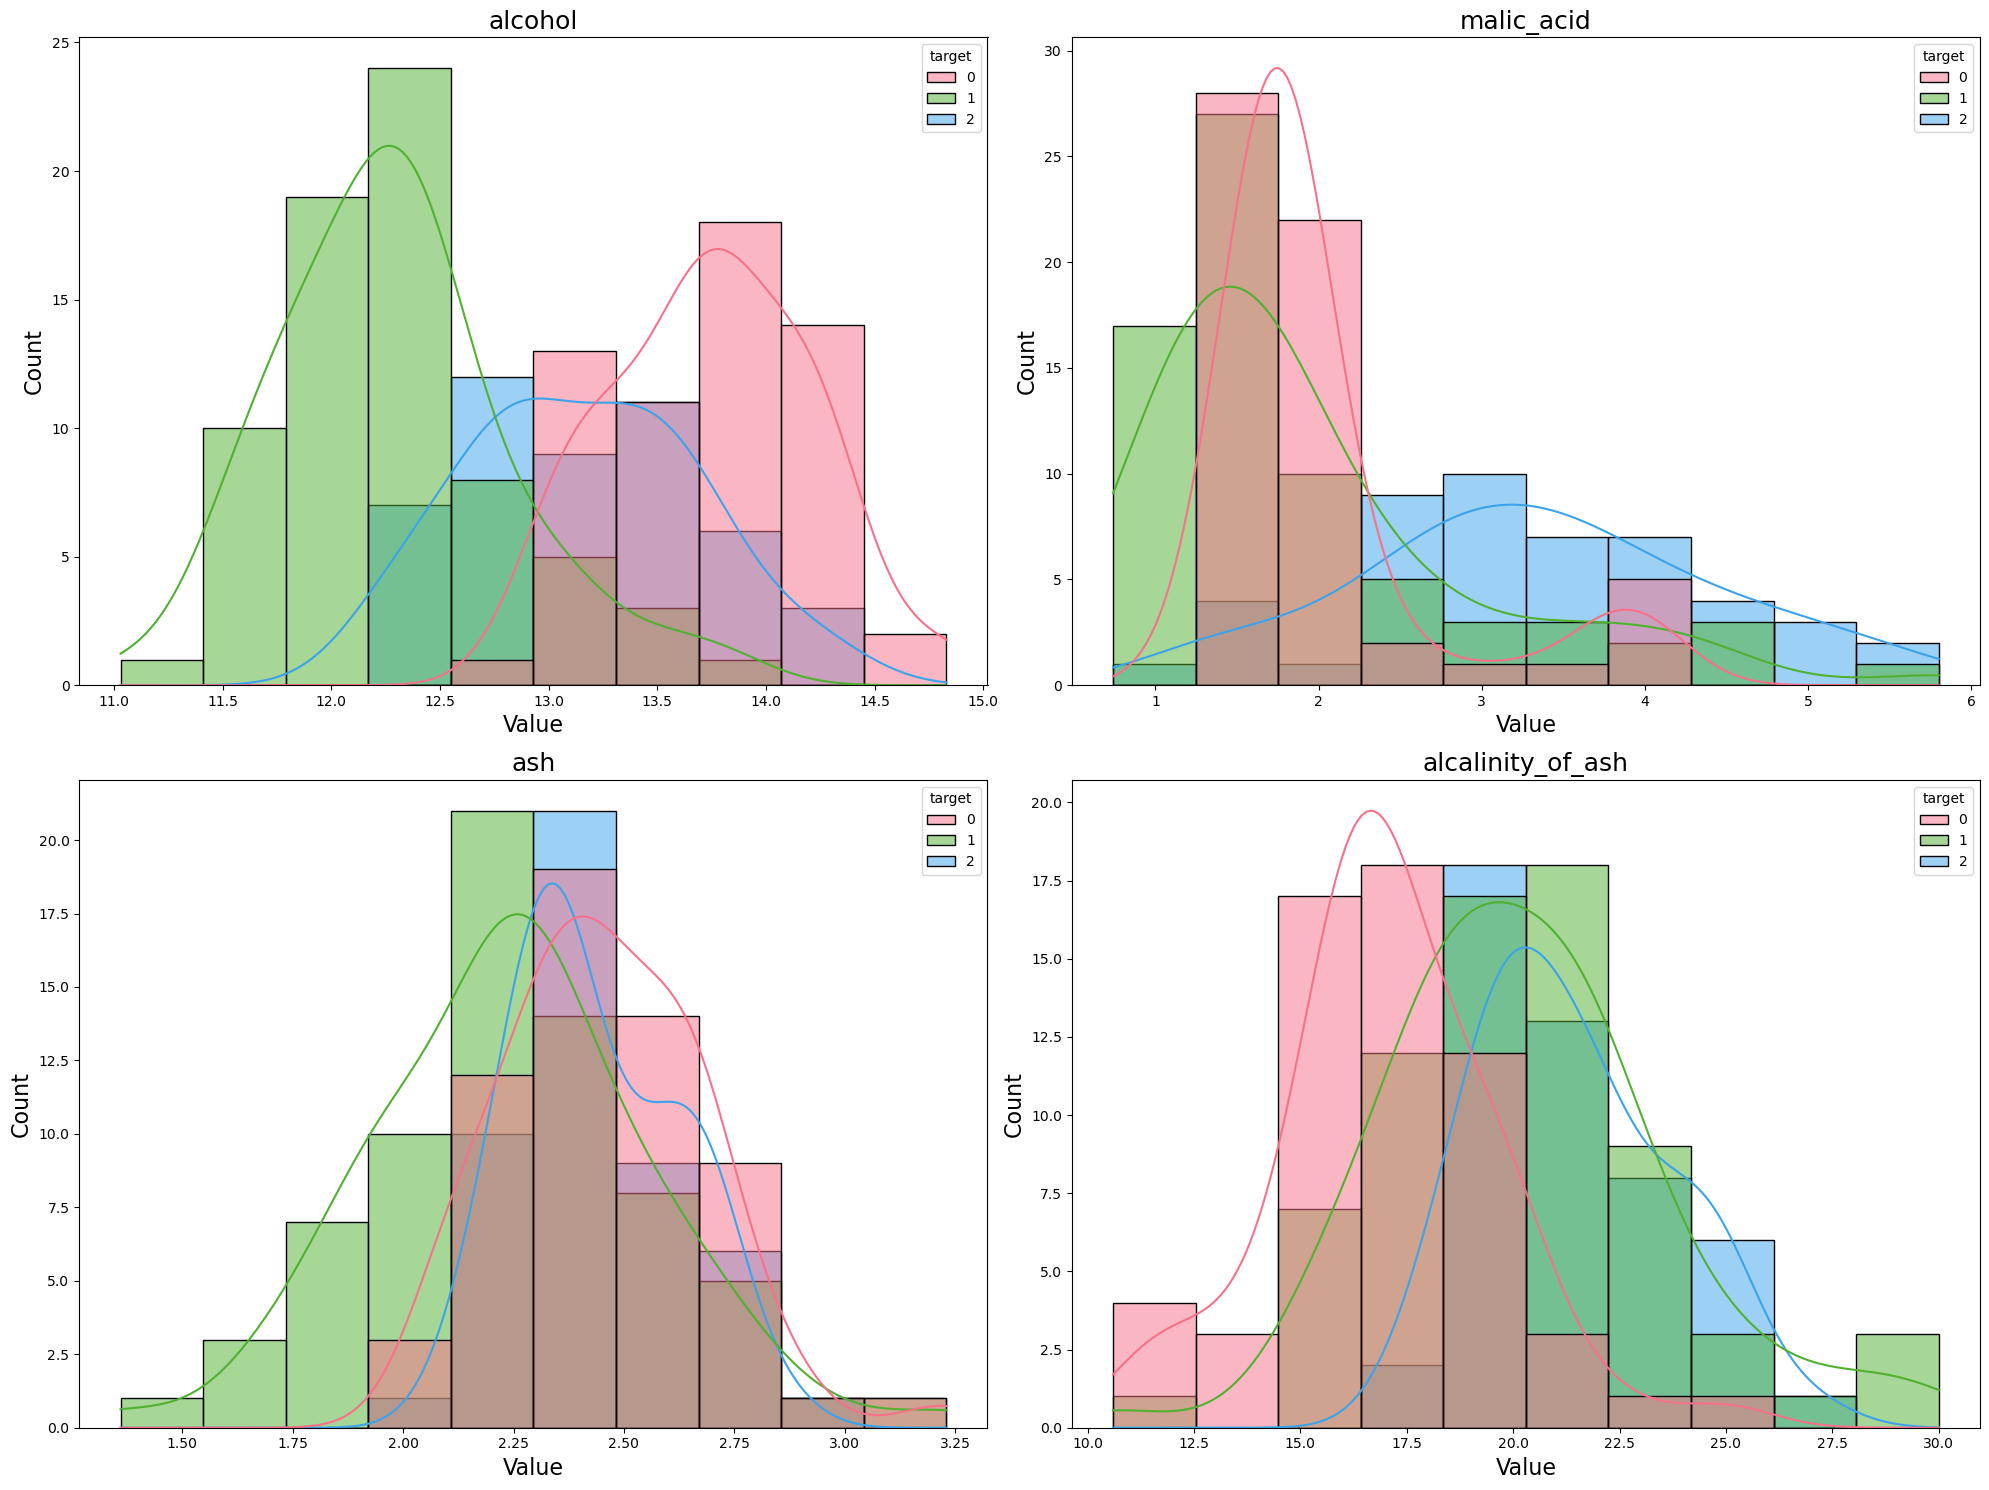

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# 特徴量のリスト
features_group_1 = ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash']

# ビンの数を指定
bin_count = 10  # ここでビンの数を指定

# プロットの作成
fig, axes = plt.subplots(2, 2, figsize=(20, 15))

# カラーパレットを指定
palette = sns.color_palette("husl", n_colors=wine_df['target'].nunique())

for i, feature in enumerate(features_group_1):
    ax = axes[i // 2, i % 2]
    sns.histplot(data=wine_df, x=feature, hue='target', kde=True, ax=ax, bins=bin_count,palette=palette)
    ax.set_title(feature, fontsize=18)
    ax.set_xlabel('Value', fontsize=16)
    ax.set_ylabel('Count', fontsize=16)
    # handles, labels = ax.get_legend_handles_labels()
    # ax.legend(handles=handles, labels=labels, fontsize=14)  # レジェンドを手動で追加

plt.tight_layout()
plt.show()



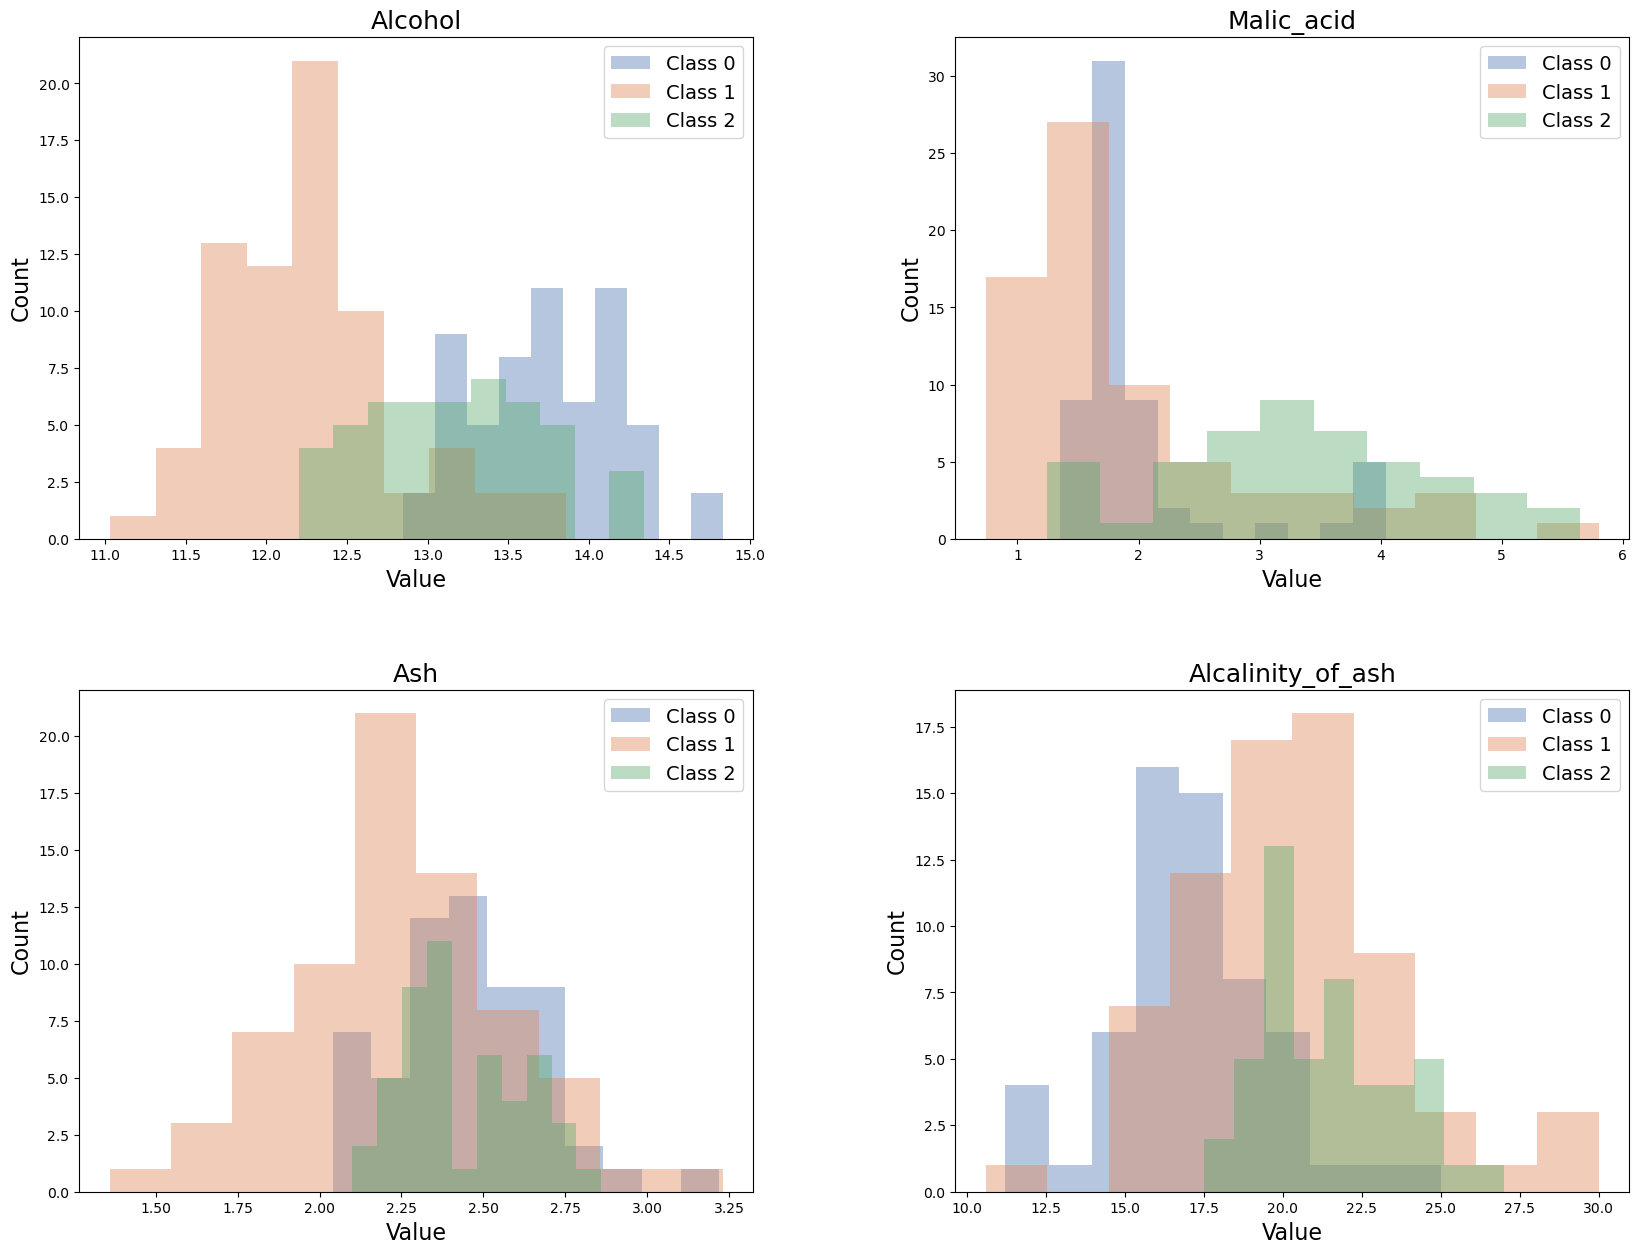

In [34]:
import matplotlib.pyplot as plt

# データの準備
features = ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash']
num_features = len(features)

# ヒストグラムを作成（最初の4つの特徴量）
fig = plt.figure(figsize=(20, 15))

for i, feature in enumerate(features):
    ax = fig.add_subplot(2, 2, i+1)
    ax.hist(wine_df[wine_df['target'] == 0][feature], bins=10, alpha=0.4, label='Class 0')
    ax.hist(wine_df[wine_df['target'] == 1][feature], bins=10, alpha=0.4, label='Class 1')
    ax.hist(wine_df[wine_df['target'] == 2][feature], bins=10, alpha=0.4, label='Class 2')
    ax.set_title(feature.capitalize(), fontsize=18)
    ax.set_xlabel('Value', fontsize=16)
    ax.set_ylabel('Count', fontsize=16)
    ax.legend(fontsize=14)

plt.subplots_adjust(wspace=0.3, hspace=0.3)
plt.show()


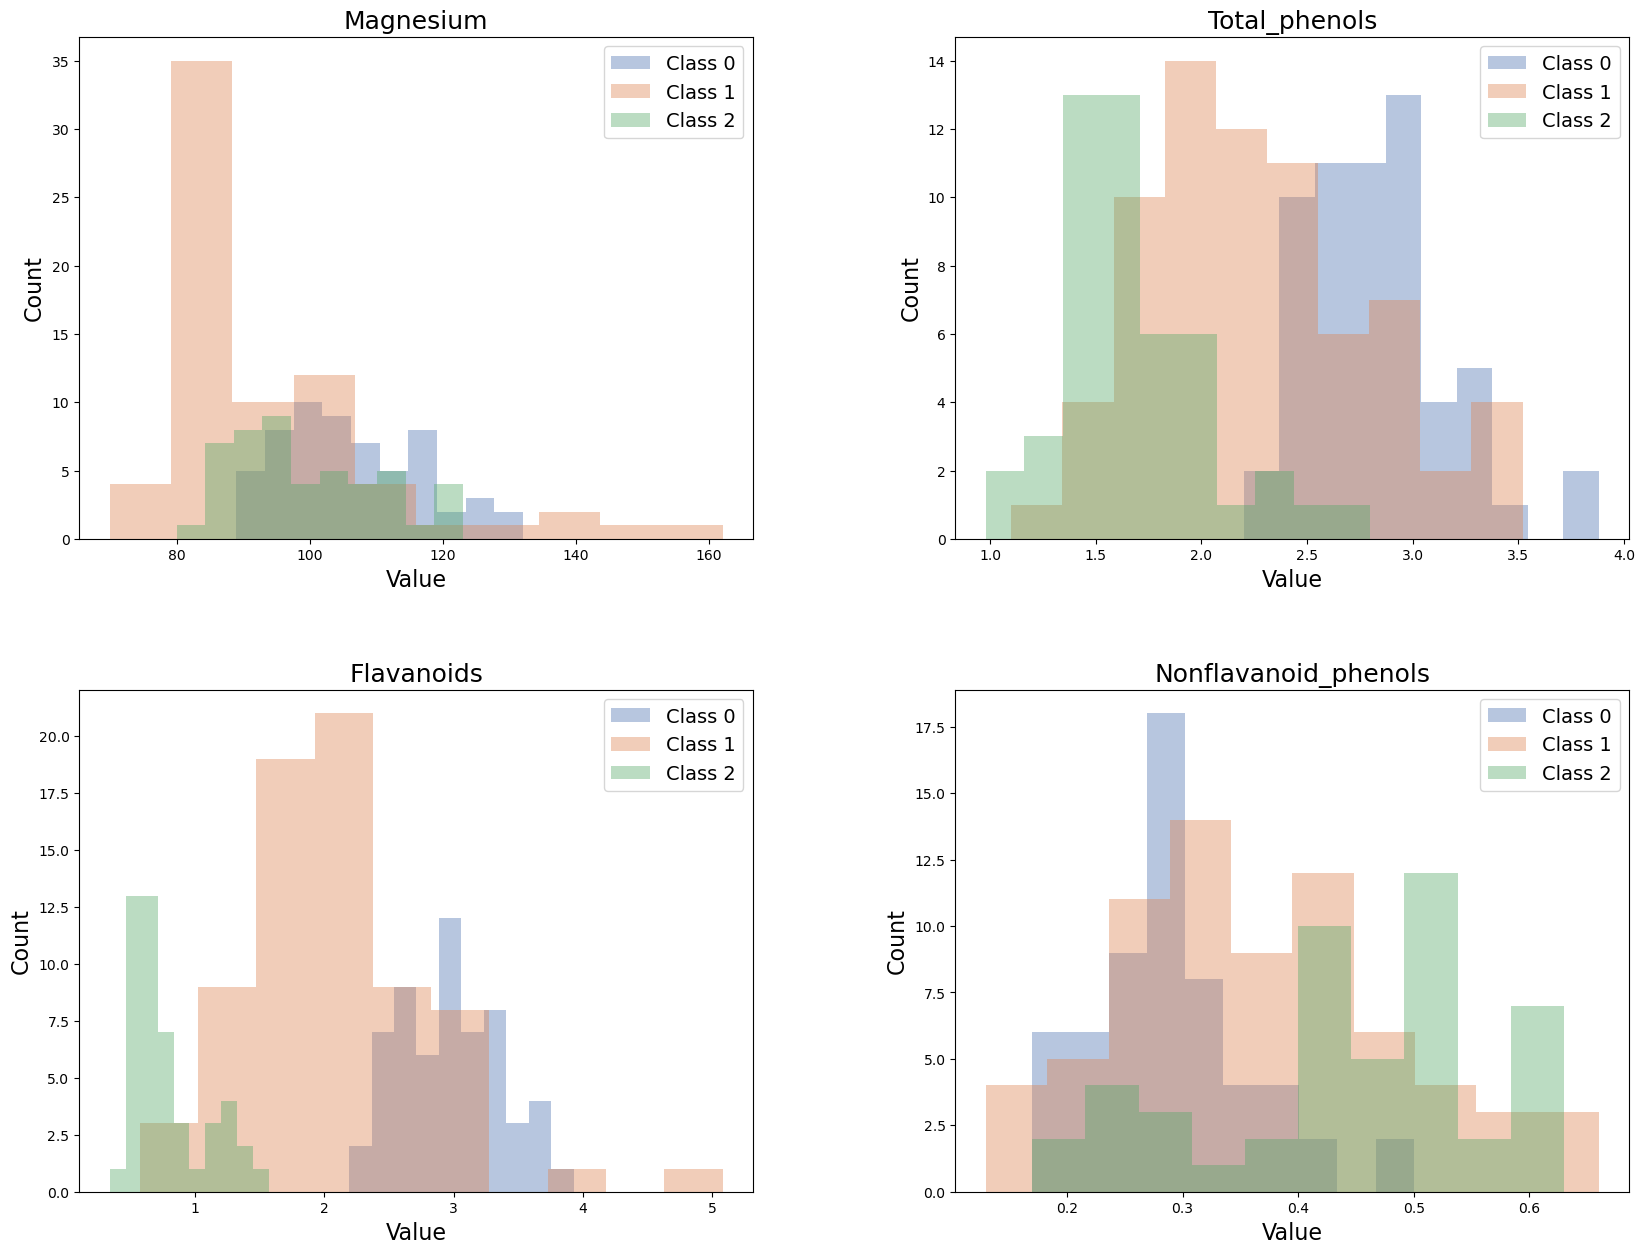

In [35]:
import matplotlib.pyplot as plt

# データの準備
features = ['magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols']
num_features = len(features)

# ヒストグラムを作成（次の4つの特徴量）
fig = plt.figure(figsize=(20, 15))

for i, feature in enumerate(features):
    ax = fig.add_subplot(2, 2, i+1)
    ax.hist(wine_df[wine_df['target'] == 0][feature], bins=10, alpha=0.4, label='Class 0')
    ax.hist(wine_df[wine_df['target'] == 1][feature], bins=10, alpha=0.4, label='Class 1')
    ax.hist(wine_df[wine_df['target'] == 2][feature], bins=10, alpha=0.4, label='Class 2')
    ax.set_title(feature.capitalize(), fontsize=18)
    ax.set_xlabel('Value', fontsize=16)
    ax.set_ylabel('Count', fontsize=16)
    ax.legend(fontsize=14)

plt.subplots_adjust(wspace=0.3, hspace=0.3)
plt.show()



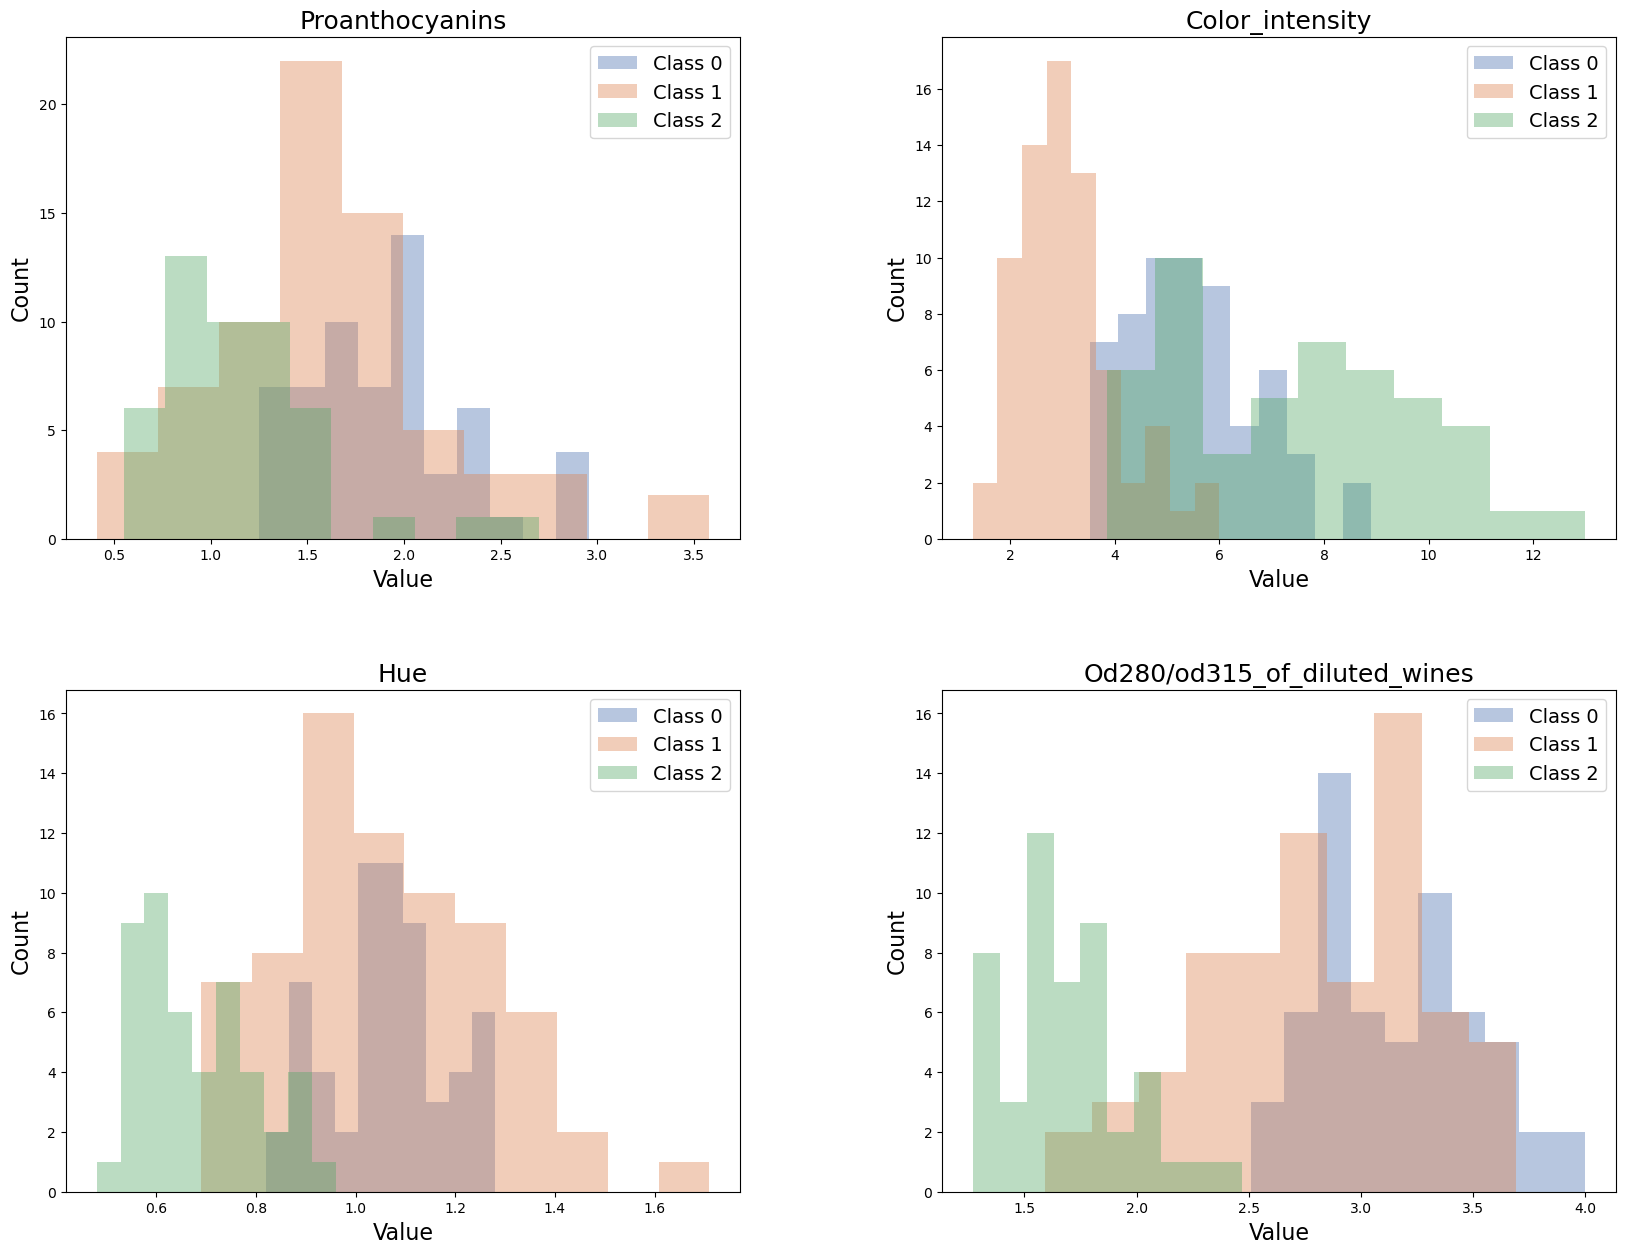

In [36]:
import matplotlib.pyplot as plt

# データの準備
features = ['proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines']
num_features = len(features)

# ヒストグラムを作成（さらに次の4つの特徴量）
fig = plt.figure(figsize=(20, 15))

for i, feature in enumerate(features):
    ax = fig.add_subplot(2, 2, i+1)
    ax.hist(wine_df[wine_df['target'] == 0][feature], bins=10, alpha=0.4, label='Class 0')
    ax.hist(wine_df[wine_df['target'] == 1][feature], bins=10, alpha=0.4, label='Class 1')
    ax.hist(wine_df[wine_df['target'] == 2][feature], bins=10, alpha=0.4, label='Class 2')
    ax.set_title(feature.capitalize(), fontsize=18)
    ax.set_xlabel('Value', fontsize=16)
    ax.set_ylabel('Count', fontsize=16)
    ax.legend(fontsize=14)

plt.subplots_adjust(wspace=0.3, hspace=0.3)
plt.show()


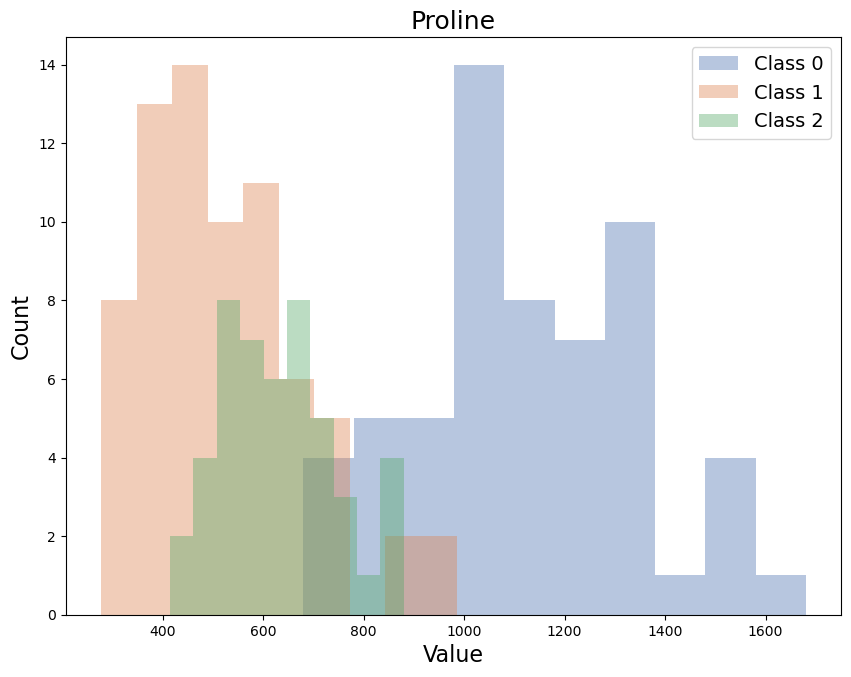

In [37]:
import matplotlib.pyplot as plt

# データの準備
features = ['proline']
num_features = len(features)

# ヒストグラムを作成（最後の1つの特徴量）
fig = plt.figure(figsize=(10, 7.5))

for i, feature in enumerate(features):
    ax = fig.add_subplot(1, 1, i+1)
    ax.hist(wine_df[wine_df['target'] == 0][feature], bins=10, alpha=0.4, label='Class 0')
    ax.hist(wine_df[wine_df['target'] == 1][feature], bins=10, alpha=0.4, label='Class 1')
    ax.hist(wine_df[wine_df['target'] == 2][feature], bins=10, alpha=0.4, label='Class 2')
    ax.set_title(feature.capitalize(), fontsize=18)
    ax.set_xlabel('Value', fontsize=16)
    ax.set_ylabel('Count', fontsize=16)
    ax.legend(fontsize=14)

plt.subplots_adjust(wspace=0.3, hspace=0.3)
plt.savefig('img_wine/wine_hist_Proline.png')
plt.show()


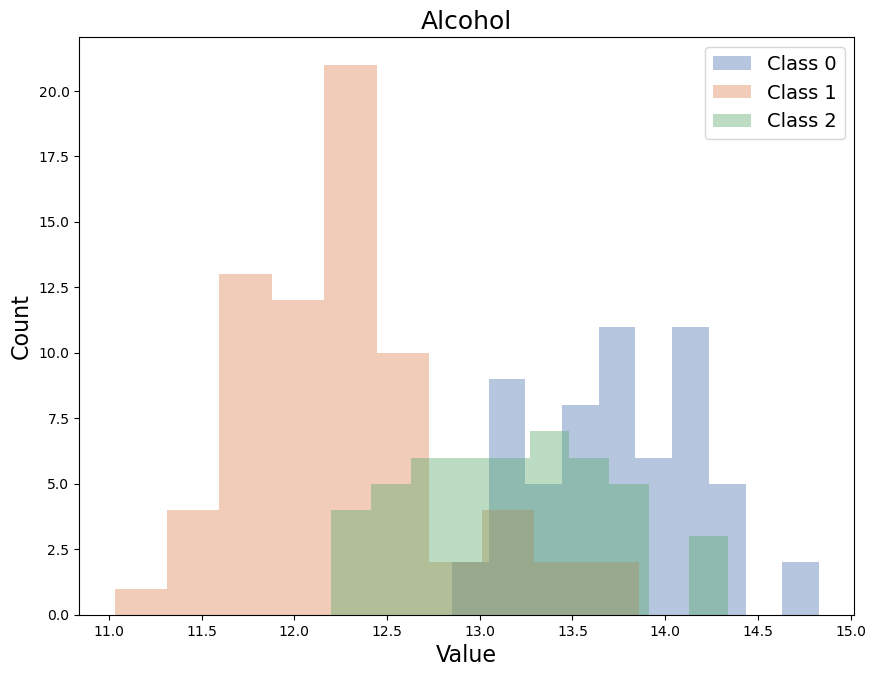

In [38]:
import matplotlib.pyplot as plt

# データの準備
features = ['alcohol']
num_features = len(features)

# ヒストグラムを作成（最後の1つの特徴量）
fig = plt.figure(figsize=(10, 7.5))

for i, feature in enumerate(features):
    ax = fig.add_subplot(1, 1, i+1)
    ax.hist(wine_df[wine_df['target'] == 0][feature], bins=10, alpha=0.4, label='Class 0')
    ax.hist(wine_df[wine_df['target'] == 1][feature], bins=10, alpha=0.4, label='Class 1')
    ax.hist(wine_df[wine_df['target'] == 2][feature], bins=10, alpha=0.4, label='Class 2')
    ax.set_title(feature.capitalize(), fontsize=18)
    ax.set_xlabel('Value', fontsize=16)
    ax.set_ylabel('Count', fontsize=16)
    ax.legend(fontsize=14)

plt.subplots_adjust(wspace=0.3, hspace=0.3)
plt.savefig('img_wine/wine_hist_Alcohol.png')
plt.show()


In [39]:
#次元削減
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_values = pca.fit_transform(wine_df.iloc[:, :-1])
pca_df = pd.DataFrame(pca_values, columns=['pc1', 'pc2'])
pca_df['target'] = wine_df['target']




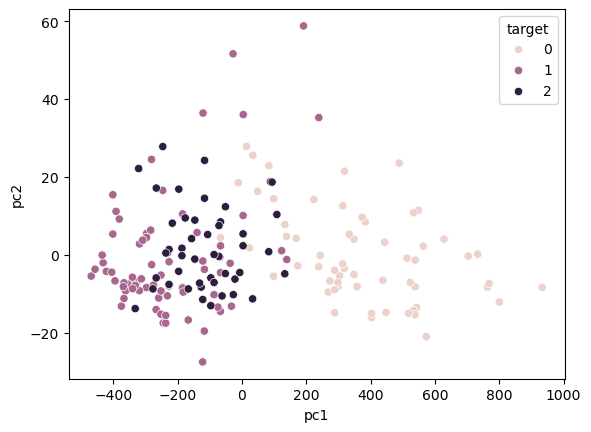

In [40]:
#主成分分析の結果をプロット
sns.scatterplot(x='pc1', y='pc2', hue='target', data=pca_df)
plt.show()

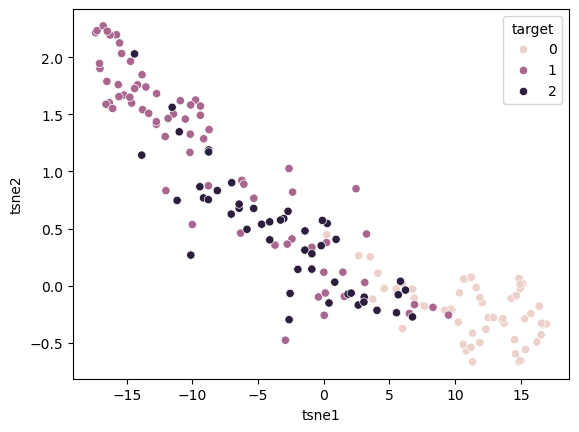

In [41]:
#t-SNE
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2)
tsne_values = tsne.fit_transform(wine_df.iloc[:, :-1])
tsne_df = pd.DataFrame(tsne_values, columns=['tsne1', 'tsne2'])
tsne_df['target'] = wine_df['target']

#t-SNEの結果をプロット
sns.scatterplot(x='tsne1', y='tsne2', hue='target', data=tsne_df)
plt.savefig('img_wine/wine_tsne.png')
plt.show()


In [26]:
#あやめのデータセットを読み込む
from sklearn.datasets import load_iris
iris = load_iris()
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df["species"] = iris.target
iris_df["species"] = iris_df["species"].map({0: "setosa", 1: "versicolor", 2: "virginica"})
iris_df.head()
iris_df




,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


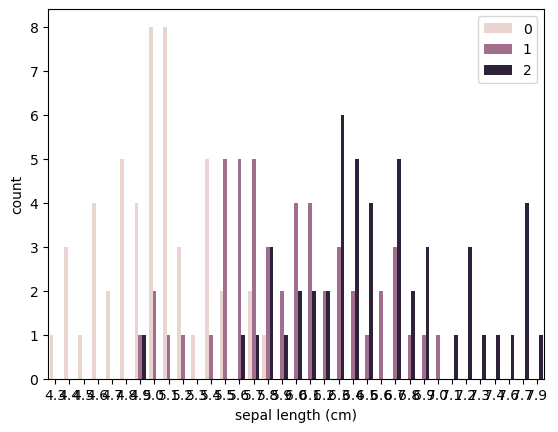

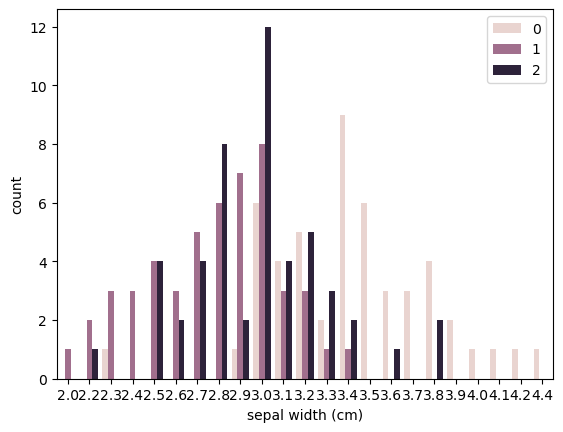

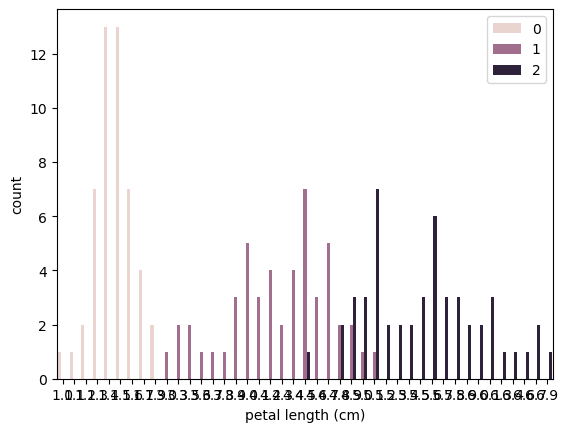

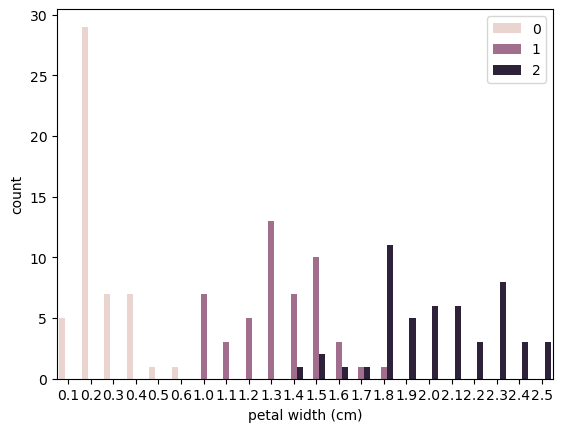

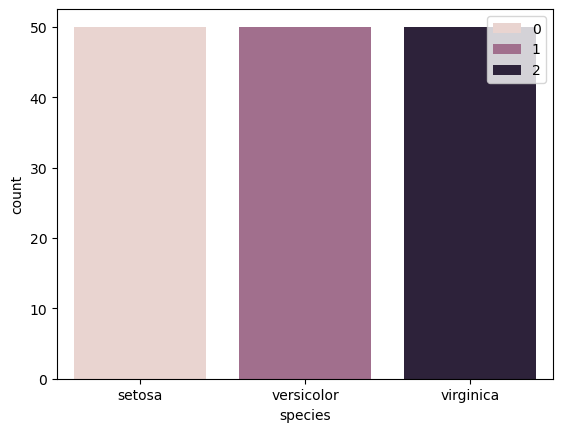

In [27]:
#各変数ごとにsns.countplot
for i in iris_df.columns:
    sns.countplot(x=i, hue=iris.target,data=iris_df)
    plt.show()

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


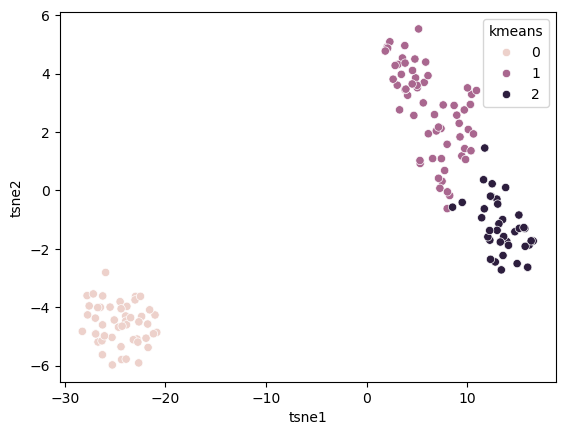

In [7]:
#あやめのデータセットを読み込む
from sklearn.datasets import load_iris
iris = load_iris()
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df["species"] = iris.target
iris_df["species"] = iris_df["species"].map({0: "setosa", 1: "versicolor", 2: "virginica"})
iris_df.head()
#クラスタリング
#KMeans
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)
kmeans.fit(iris_df.iloc[:, :-1])
iris_df['kmeans'] = kmeans.labels_


#次元削減
#t-SNE

tsne = TSNE(n_components=2)
tsne_values = tsne.fit_transform(iris_df.iloc[:, :-2])
tsne_df = pd.DataFrame(tsne_values, columns=['tsne1', 'tsne2'])
tsne_df['kmeans'] = iris_df['kmeans']

#t-SNEの結果をプロット
sns.scatterplot(x='tsne1', y='tsne2', hue='kmeans', data=tsne_df)
plt.show()


In [12]:
#次元圧縮
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(iris.data)
iris_pca = pca.transform(iris.data)
iris_pca_df = pd.DataFrame(iris_pca, columns=["PC1", "PC2"])
iris_pca_df["species"] = iris.target
iris_pca_df["species"] = iris_pca_df["species"].map({0: "setosa", 1: "versicolor", 2: "virginica"})
iris_pca_df.head()



,PC1,PC2,species
0,-2.684126,0.319397,setosa
1,-2.714142,-0.177001,setosa
2,-2.888991,-0.144949,setosa
3,-2.745343,-0.318299,setosa
4,-2.728717,0.326755,setosa


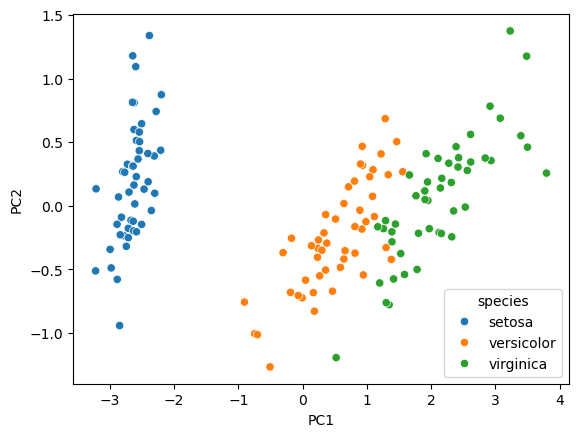

In [13]:
#主成分分析の結果をプロット
sns.scatterplot(x="PC1", y="PC2", hue="species", data=iris_pca_df)
plt.show()


In [10]:
#t-SNE
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=0)
iris_tsne = tsne.fit_transform(iris.data)
iris_tsne_df = pd.DataFrame(iris_tsne, columns=["t-SNE1", "t-SNE2"])
iris_tsne_df["species"] = iris.target
iris_tsne_df["species"] = iris_tsne_df["species"].map({0: "setosa", 1: "versicolor", 2: "virginica"})
iris_tsne_df.head()


,t-SNE1,t-SNE2,species
0,-23.954458,-4.301396,setosa
1,-26.704016,-5.191670,setosa
2,-26.470518,-4.005190,setosa
3,-26.966654,-4.374567,setosa
4,-23.944723,-4.475959,setosa


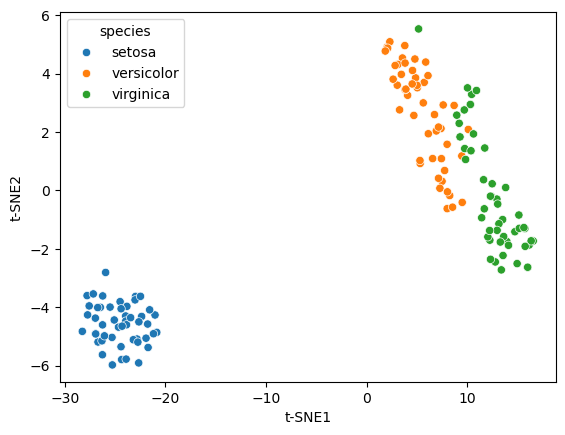

In [11]:
#t-SNEの結果をプロット
sns.scatterplot(x="t-SNE1", y="t-SNE2", hue="species", data=iris_tsne_df)
plt.show()


/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/

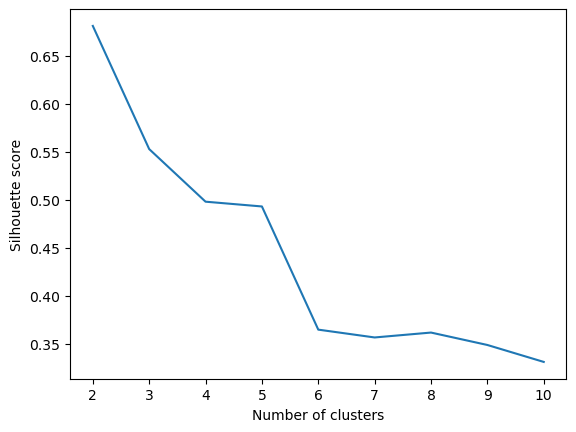

In [14]:
#シルエット係数
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
silhouette_scores = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(iris.data)
    silhouette_scores.append(silhouette_score(iris.data, kmeans.labels_))
plt.plot(range(2, 11), silhouette_scores)
plt.xlabel("Number of clusters")
plt.ylabel("Silhouette score")
plt.show()

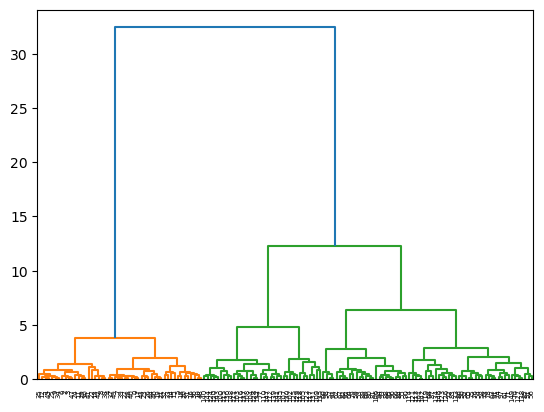

In [15]:
#階層的クラスタリング
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt
# クラスタリングの実行
result1 = linkage(iris.data, method='ward')
# デンドログラムの表示
dendrogram(result1)
plt.show()

# MNIST

In [16]:
#mnistデータセット
from sklearn.datasets import fetch_openml
mnist = fetch_openml("mnist_784")
mnist_df = pd.DataFrame(mnist.data, columns=mnist.feature_names)
mnist_df["label"] = mnist.target
mnist_df.head()


/opt/anaconda3/lib/python3.11/site-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(
/var/folders/5r/3m3ng3v11j57dkl0psc9lphh0000gn/T/ipykernel_17876/43677250.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mnist_df["label"] = mnist.target


,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,label
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9


In [17]:
#次元圧縮
pca = PCA(n_components=2)
pca.fit(mnist.data)
mnist_pca = pca.transform(mnist.data)
mnist_pca_df = pd.DataFrame(mnist_pca, columns=["PC1", "PC2"])
mnist_pca_df["label"] = mnist.target
mnist_pca_df.head()


,PC1,PC2,label
0,122.255738,-316.231933,5
1,1010.494625,-289.964820,0
2,-58.997083,393.699454,4
3,-796.964689,-607.422681,1
4,-391.317727,729.801725,9


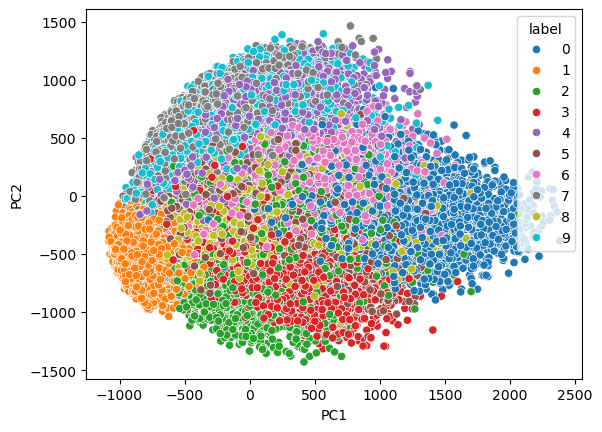

In [12]:
#主成分分析の結果をプロット
sns.scatterplot(x="PC1", y="PC2", hue="label", data=mnist_pca_df)
plt.show()

In [13]:
#t-SNE
tsne = TSNE(n_components=2, random_state=0)
mnist_tsne = tsne.fit_transform(mnist.data)
mnist_tsne_df = pd.DataFrame(mnist_tsne, columns=["t-SNE1", "t-SNE2"])
mnist_tsne_df["label"] = mnist.target
mnist_tsne_df.head()

,t-SNE1,t-SNE2,label
0,33.150227,-1.472984,5
1,68.851837,-37.980206,0
2,35.138046,85.667114,4
3,-62.975666,-47.118565,1
4,-14.520585,44.749184,9


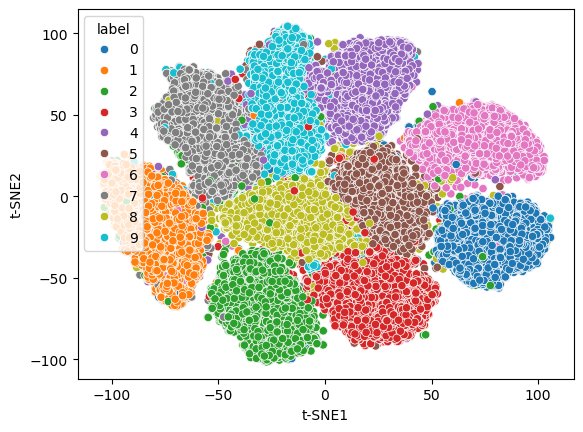

In [14]:
#t-SNEの結果をプロット
sns.scatterplot(x="t-SNE1", y="t-SNE2", hue="label", data=mnist_tsne_df)
plt.show()


/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/

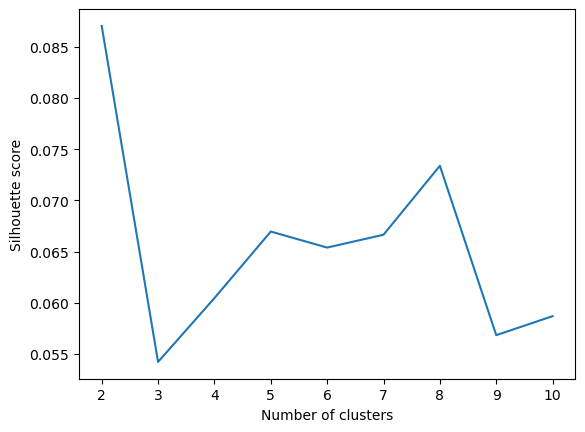

In [15]:
#シルエット係数
silhouette_scores = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(mnist.data)
    silhouette_scores.append(silhouette_score(mnist.data, kmeans.labels_))
plt.plot(range(2, 11), silhouette_scores)
plt.xlabel("Number of clusters")
plt.ylabel("Silhouette score")
plt.show()


In [16]:
#階層的クラスタリング
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt
# クラスタリングの実行
result1 = linkage(mnist.data, method='ward')
# デンドログラムの表示
dendrogram(result1)
plt.show()
